# The AKLT model and expectation values of MPS


For more information on the spin-1 AKLT state please see the lectures or the Wikipedia page (https://en.wikipedia.org/wiki/AKLT_model). First, one associates each spin-1 particle on each physical site with two spin-1/2 (virtual) particles, and each of which forms a spin singlet (S=0), i.e, a valence bond, with the virtual particles on its neighboring site. The tensor diagram representation of such spin singlet is:

![title](../Img/04/04_01.png)

Here all legs have dimension 2. The physical legs (bottom legs) have dimension 2 since they are associated with spin-1/2's. And the virtual legs (horizontal legs) connecting vertices is of size 2 since the Schmidt rank (i.e. number of nonzero Schmidt coefficients, or equivalently, of singular values) is 2. Then we arrange the singlets, and associate the right physical leg of one singlet and the left physical leg of the singlet on its right into each physical site:

![title](../Img/04/04_02.png)


Each site has two spin-1/2's, so the total spin of the site can be either   or   . Then we project the local spaces into the subspace:

![title](../Img/04/04_03.png)

The triangles denote the isometries that map the Hilbert space of one spin-1 into a subspace of the product space of two spin-1/2's. By contracting the tensors associated with the same site (marked by the dashed-line box), we obtain the rank-3 tensors that constitute the AKLT state as an MPS. By construction, all the tensors here are identical. The left and right legs of each tensor have dimension 2, which corresponds to the Schmidt rank 2 of the spin singlet. The physical (bottom) legs have dimension 3, for the spin-1's, with index values 1, 2, and 3 representing the local spins
states |S<sub>z</sub>=+1>, |S<sub>z</sub>=0> and |S<sub>z</sub>=-1>, respectively.

### Generation of the AKLT state (MPS) with open boundary conditions

In [1]:
# First of all we load the modules that we will need for the tutorial

using LinearAlgebra, PyPlot;
include("../Tensor_modules/contract.jl");
include("../Tensor_modules/canonForm.jl");

We define a general function that generate the AKLT MPS. The tensor at each bulk site (i.e., any site except the left- and rightmost sites) is defined as 3-dimensional array, AKLT. As we are considering a finite system with open boundary condition, the left- and right-most legs of the MPS should have dimension 1, to represent a single global quantum state. Therefore, we project the space of the left leg of M[1] and the space of the right leg of M[end] onto the subspaces of size 1 for each leg. Since the left and right legs have dimension 2, there are 4=2x2 different global states, which are linearly independent. We'll denote them by |&Psi;(&alpha;,&beta;)> with &alpha;=1,2 is chosen for the left leg of M[1] and &beta;=1,2 for the right leg of M[end].

In [2]:
function generate_AKLT(N,o)
    # Initialize the local AKLT tensor
    AKLT = zeros(2,3,2);

    # local spin Sz = -1
    AKLT[2,1,1] = -sqrt(2/3);
    # local spin Sz = 0
    AKLT[1,2,1] = -1/sqrt(3);
    AKLT[2,2,2] = +1/sqrt(3);
    # local spin Sz = +1
    AKLT[1,3,2] = sqrt(2/3);

    # Initialize the MPS on the number of sites N
    M = Vector{Union{Nothing, Array{Float64,3}}}(nothing, N);
    for i in 1:N
        M[i] = AKLT[:,:,:];
    end
    
    # Open boundary condition --> unpaired 1/2 spin
    if o == 1
        # |Ψ(α,β)> = |Ψ(1,1)>
        M[1]   = reshape(AKLT[1,:,:],(1,3,2));
        M[end] = reshape(AKLT[:,:,1],(2,3,1));
    elseif o == 2
        # |Ψ(α,β)> = |Ψ(1,2)>
        M[1]   = reshape(AKLT[1,:,:],(1,3,2));
        M[end] = reshape(AKLT[:,:,2],(2,3,1));
    elseif o == 3
        # |Ψ(α,β)> = |Ψ(2,1)>
        M[1]   = reshape(AKLT[2,:,:],(1,3,2));
        M[end] = reshape(AKLT[:,:,1],(2,3,1));
    elseif o == 4
        # |Ψ(α,β)> = |Ψ(2,2)>
        M[1]   = reshape(AKLT[2,:,:],(1,3,2));
        M[end] = reshape(AKLT[:,:,2],(2,3,1));
    else
        error("ERROR: The open boundary condition is an index [0:4]");
    end
    return M;
end

generate_AKLT (generic function with 1 method)

Consider for example an AKLT MPS with 50 sites and open boundary condition |&Psi;(1,1)>. Generate it and bring it to left-canonical form (the same is valid also for right-canonical): indeed for computing the expectation values, it is convenient to normalize the MPS, otherwise one needs to divide the expectation value with the square of the norm of the MPS.

In [3]:
N = 50;
o = 1;
M = generate_AKLT(N,o);

In [4]:
# Check that a bulk AKLT tensor is left-normalized
T = contract(conj(M[20]),3,[1 2],M[20],3,[1 2])

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
# Check that an AKLT tensor is right-normalized
T = contract(conj(M[20]),3,[2 3],M[20],3,[2 3])

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [6]:
# Check that the left-most AKLT tensor is not left-normalized
T = contract(conj(M[1]),3,[1 2],M[1],3,[1 2])

2×2 Array{Float64,2}:
 0.333333  0.0     
 0.0       0.666667

In [7]:
# Check that the left-most AKLT tensor is right-normalized
T = contract(conj(M[1]),3,[2 3],M[1],3,[2 3])

1×1 Array{Float64,2}:
 1.0

In [8]:
# Check that the right-most AKLT tensor is left-normalized
T = contract(conj(M[end]),3,[1 2],M[end],3,[1 2])

1×1 Array{Float64,2}:
 1.0

In [9]:
# Check that the right-most AKLT tensor is not right-normalized
T = contract(conj(M[end]),3,[2 3],M[end],3,[2 3])

2×2 Array{Float64,2}:
 0.333333  0.0     
 0.0       0.666667

In [10]:
M, S, D = canonForm(M,length(M));
println("The norm of the AKLT MPS is: $S")

The norm of the AKLT MPS is: [0.7071067811865489]


### Local magnetization of the AKLT MPS

We now want to compute the expectation value of the S<sub>z</sub> local operator on site j, with j running over all sites of the MPS. Notice that the S<sub>z</sub> local operator is defined as a rank-2 tensor of dimensions (3,3) since it acts on the space of spin state |S<sub>z</sub>=+1>, |S<sub>z</sub>=0> and |S<sub>z</sub>=-1> :

In [11]:
# Generate the Sz operator
Sz = zeros(3,3);
Sz[1,1] = 1.0;
Sz[3,3] = -1.0;

Sz

3×3 Array{Float64,2}:
 1.0  0.0   0.0
 0.0  0.0   0.0
 0.0  0.0  -1.0

Since there is no reason to have it as a global quantity, we will define it inside the function for computing the local magnetization.

The expectation value of an operator in a LC MPS is computed by "closing the zipper" from left to right:

![title](../Img/04/04_04.png)

In [12]:
function local_magnetization(M)
    # Generate the Sz local operator
    # Leg order of Sz: bottom (1) towards bras - top (2) towards kets
    Sz = zeros(3,3);
    Sz[1,1] = 1.0;
    Sz[3,3] = -1.0;

    # Initialize the vector containing magnetization over the MPS
    A = [];

    # Compute the expectation value of Sz
    for i in 1:N
        # contraction at site i
        # contract BRA and Sz
        # permute to have leg order left-physical-right
        T = contract(conj(M[i]),3,[2],Sz,2,[1],[1 3 2]);
        # contract with KET
        T = contract(T,3,[1 2],M[i],3,[1 2]);
        # Leg order of T: bottom (1) towards bras - top (2) towards kets
        for j in (i+1):N
            T = contract(T,2,[1],conj(M[j]),3,[1]);
            T = contract(T,3,[1 2],M[j],3,[1 2]);
        end
        
    # Store the magnetization at site i
    append!(A,T);
    end
    return A;
end

local_magnetization (generic function with 1 method)

We can now compute the magnetization and check whether it is consistent with the exact result:

\begin{align}
&<\Psi(1,1)|S_{[j],z}|\Psi(1,1)> = - <\Psi(2,2)|S_{[j],z}|\Psi(2,2)> = \frac{(-\frac{1}{3})^j-(-\frac{1}{3})^{N-j+1}}{\frac{1}{2}[1+(-\frac{1}{3})^N]} \\
\\
&<\Psi(1,2)|S_{[j],z}|\Psi(1,2)> = - <\Psi(2,1)|S_{[j],z}|\Psi(2,1)> = \frac{(-\frac{1}{3})^j+(-\frac{1}{3})^{N-j+1}}{\frac{1}{2}[1-(-\frac{1}{3})^N]}
\end{align}

In [13]:
function exact_magnetization_AKLT(x,o)
    f = [];
    t = 0.0;
    if o == 1
        for i in 1:length(x)
            t = ((-1.0/3.0)^x[i] - (-1.0/3.0)^(length(x)-x[i]+1))/(0.5*(1+(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    elseif o == 2
        for i in 1:length(x)
            t = ((-1.0/3.0)^x[i] + (-1.0/3.0)^(length(x)-x[i]+1))/(0.5*(1-(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    elseif o == 3
        for i in 1:length(x)
            t = -((-1.0/3.0)^x[i] + (-1.0/3.0)^(length(x)-x[i]+1))/(0.5*(1-(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    else
        for i in 1:length(x)
            t = -((-1.0/3.0)^x[i] - (-1.0/3.0)^(length(x)-x[i]+1))/(0.5*(1+(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    end
    return f;
end

exact_magnetization_AKLT (generic function with 1 method)

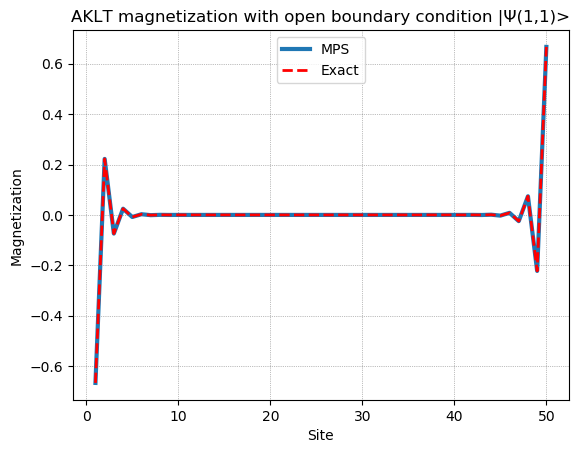

In [14]:
x = (1:50)
Sz_avg     = local_magnetization(M);
AKLT_exact = exact_magnetization_AKLT(x,o);

title("AKLT magnetization with open boundary condition |Ψ(1,1)>")
ylabel("Magnetization");
xlabel("Site")
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,Sz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

We can now try with different open-boundary conditions

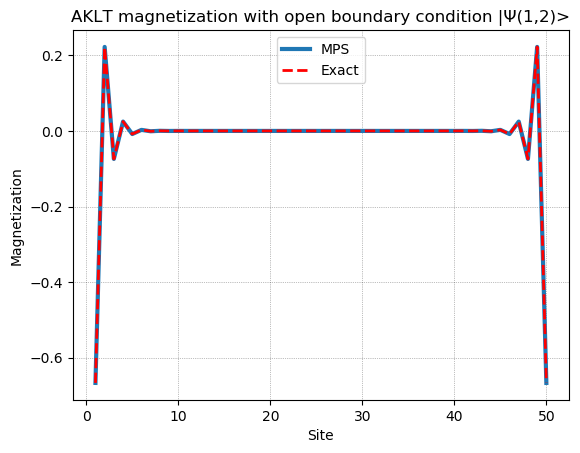

In [15]:
# Open boundary condition |Ψ(1,2)>
N = 50;
o = 2;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:50)
Sz_avg     = local_magnetization(M);
AKLT_exact = exact_magnetization_AKLT(x,o);

title("AKLT magnetization with open boundary condition |Ψ(1,2)>")
ylabel("Magnetization");
xlabel("Site")
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,Sz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

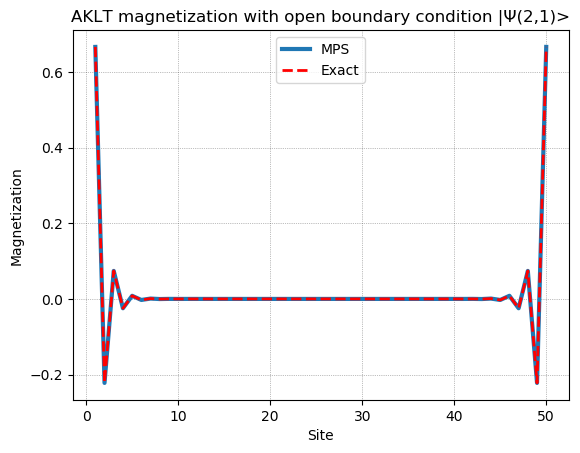

In [16]:
# Open boundary condition |Ψ(2,1)>
N = 50;
o = 3;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:50)
Sz_avg     = local_magnetization(M);
AKLT_exact = exact_magnetization_AKLT(x,o);

title("AKLT magnetization with open boundary condition |Ψ(2,1)>")
ylabel("Magnetization");
xlabel("Site")
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,Sz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

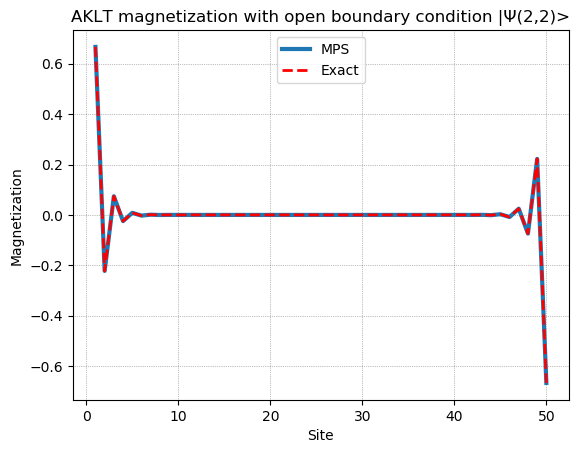

In [17]:
# Open boundary condition |Ψ(2,2)>
N = 50;
o = 4;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:50)
Sz_avg     = local_magnetization(M);
AKLT_exact = exact_magnetization_AKLT(x,o);

title("AKLT magnetization with open boundary condition |Ψ(2,2)>")
ylabel("Magnetization");
xlabel("Site")
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,Sz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

### Spin correlation function of the AKLT MPS

The spin-spin correlation function can be simply computed by evaluating at the same time the Sz operator on site j and site j+1. Again, the numerical values can be compared to the exact result:

\begin{align}
&<\Psi(1,1)|S_{[j],z}S_{[j+1],z}|\Psi(1,1)> = <\Psi(2,2)|S_{[j],z}S_{[j+1],z}|\Psi(2,2)> = \frac{(-\frac{2}{9})-2(-\frac{1}{3})^{N}}{\frac{1}{2}[1+(-\frac{1}{3})^N]} \\
\\
&<\Psi(1,2)|S_{[j],z}S_{[j+1],z}|\Psi(1,2)> = <\Psi(2,1)|S_{[j],z}S_{[j+1],z}|\Psi(2,1)> = \frac{(-\frac{2}{9})+2(-\frac{1}{3})^{N}}{\frac{1}{2}[1-(-\frac{1}{3})^N]}
\end{align}

In [18]:
# First of all define the two functions
function spin_spin_correlation(M)
    # Generate the Sz local operator
    # Leg order of Sz: bottom (1) towards bras - top (2) towards kets
    Sz = zeros(3,3);
    Sz[1,1] = 1.0;
    Sz[3,3] = -1.0;

    # Initialize the vector containing correlation over the MPS
    B = [];

    # Compute the expectation value of Sz[j]-Sz[j+1]
    for i in 1:(N-1)
        ## Contraction at site i
        # Contraction of BRA and Sz[i]
        T = contract(conj(M[i]),3,[2],Sz,2,[1],[1 3 2]);
        # Contraction with KET at site i
        T = contract(T,3,[1 2],M[i],3,[1 2]);
        # Leg order of T: bottom (1) towards bras - top (2) towards kets
        ## Contraction at site i+1
        # Contraction with BRA at site i+1
        T = contract(T,2,[1],conj(M[i+1]),3,[1]);
        # Contraction of BRA and Sz[i+1]
        T = contract(T,3,[2],Sz,2,[1],[1 3 2]);
        # Contraction with KET at site i+1
        T = contract(T,3,[1 2],M[i+1],3,[1 2]);
        # Leg order of T: bottom (1) towards bras - top (2) towards kets
        for j in (i+2):N
            T = contract(T,2,[1],conj(M[j]),3,[1]);
            T = contract(T,3,[1 2],M[j],3,[1 2]);
        end

        # Store the magnetization at site i
        append!(B,T);
    end
    return B;
end

function exact_correlation_AKLT(x,o)
    f = [];
    t = 0.0;
    if (o == 1) || (o == 4)
        for i in 1:length(x)
            t = ((-2.0/9.0) - 2.0*(-1.0/3.0)^length(x))/(0.5*(1+(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    else
        for i in 1:length(x)
            t = ((-2.0/9.0) + 2.0*(-1.0/3.0)^length(x))/(0.5*(1-(-1.0/3.0)^length(x)));
            append!(f,t);
            t = 0;
        end
    end
    return f;
end

exact_correlation_AKLT (generic function with 1 method)

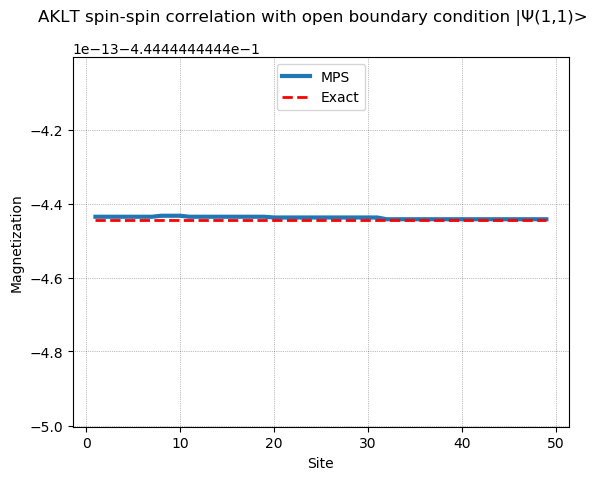

In [19]:
# Open boundary condition |Ψ(1,1)>
N = 50;
o = 1;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:49)
SzSz_avg     = spin_spin_correlation(M);
AKLT_exact = exact_correlation_AKLT(x,o);

suptitle("AKLT spin-spin correlation with open boundary condition |Ψ(1,1)>")
ylabel("Magnetization");
xlabel("Site");
ymin = -4444444444445*10^(-13);
ymax = -4444444444444*10^(-13);
ylim(ymin,ymax);
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,SzSz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

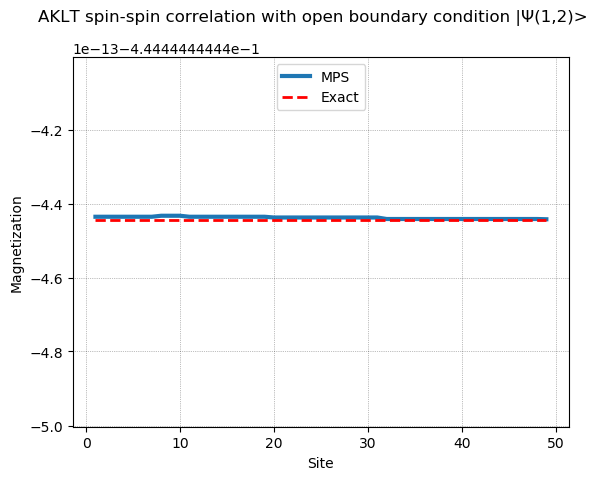

In [20]:
# Open boundary condition |Ψ(1,2)>
N = 50;
o = 2;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:49)
SzSz_avg     = spin_spin_correlation(M);
AKLT_exact = exact_correlation_AKLT(x,o);

suptitle("AKLT spin-spin correlation with open boundary condition |Ψ(1,2)>")
ylabel("Magnetization");
xlabel("Site");
ymin = -4444444444445*10^(-13);
ymax = -4444444444444*10^(-13);
ylim(ymin,ymax);
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,SzSz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

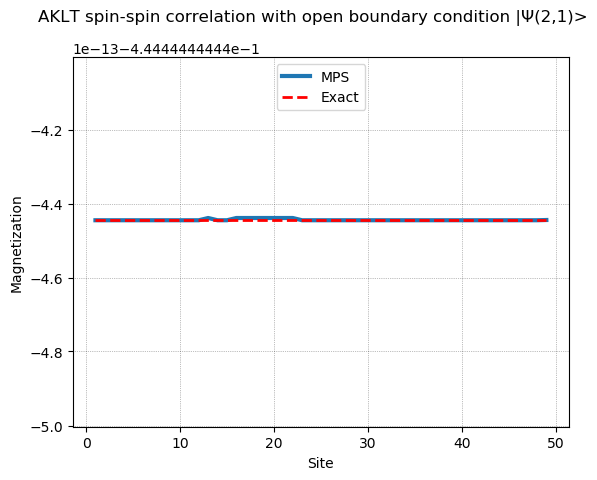

In [21]:
# Open boundary condition |Ψ(2,1)>
N = 50;
o = 3;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:49)
SzSz_avg     = spin_spin_correlation(M);
AKLT_exact = exact_correlation_AKLT(x,o);

suptitle("AKLT spin-spin correlation with open boundary condition |Ψ(2,1)>")
ylabel("Magnetization");
xlabel("Site");
ymin = -4444444444445*10^(-13);
ymax = -4444444444444*10^(-13);
ylim(ymin,ymax);
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,SzSz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");

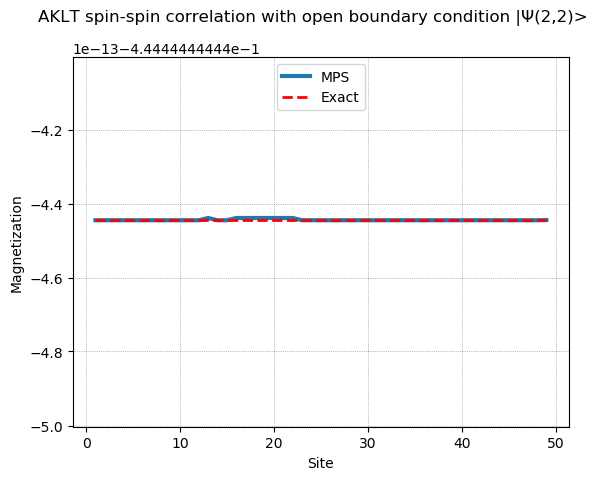

In [22]:
# Open boundary condition |Ψ(2,2)>
N = 50;
o = 4;
M = generate_AKLT(N,o);
M, S, D = canonForm(M,length(M));
x = (1:49)
SzSz_avg     = spin_spin_correlation(M);
AKLT_exact = exact_correlation_AKLT(x,o);

suptitle("AKLT spin-spin correlation with open boundary condition |Ψ(2,2)>")
ylabel("Magnetization");
xlabel("Site");
ymin = -4444444444445*10^(-13);
ymax = -4444444444444*10^(-13);
ylim(ymin,ymax);
grid(linewidth=0.5,color="black",linestyle="dotted",alpha=0.5);
plot(x,SzSz_avg,linewidth=3.0,label="MPS");
plot(x,AKLT_exact,"--",linewidth=2.0,label="Exact",color="red");
legend(loc="upper center");